# Plotting 2D Data - Contour Plots

We might sometimes want to represent higher dimension data. We will be creating something called a [contour plot](https://www.khanacademy.org/math/multivariable-calculus/thinking-about-multivariable-function/ways-to-represent-multivariable-functions/a/contour-maps). A contour plot can be used when you have data which has three dimensions (`x`, `y` and `z`). A type of contour plot you may be familar with depicts land elevation. Each spot on a map will have an `x` value, a `y` value, and a `z` value (the elevation). You can represent this on a two dimensional plot where the z-value is indicated by a contour line or different colors.

This section will discuss creating contour plots using `matplotlib`. We will use the hydrogen atom orbitals again. Instead of considering the `s` orbitals with respect to `r` (distance from the nucleus), we are going to use the values of the `p` wavefunctions on the `xy` plane. 

The data file we will use is called `px_2D.csv`

Reading in the data
-----------------------

This file is also a csv, so we will use pandas to read it in.

In [1]:
import pandas as pd

px = pd.read_csv("px_2D.csv")

In [2]:
px.head()

,0.000000000000000000e+00,-2.000000000000000000e+01,-1.900000000000000000e+01,-1.800000000000000000e+01,-1.700000000000000000e+01,-1.600000000000000000e+01,-1.500000000000000000e+01,-1.400000000000000000e+01,-1.300000000000000000e+01,-1.200000000000000000e+01,...,1.100000000000000000e+01,1.200000000000000000e+01,1.300000000000000000e+01,1.400000000000000000e+01,1.500000000000000000e+01,1.600000000000000000e+01,1.700000000000000000e+01,1.800000000000000000e+01,1.900000000000000000e+01,2.000000000000000000e+01
0,-20.0,0.000353,0.000410,0.000472,0.000538,0.000606,0.000675,0.000742,0.000805,0.000861,...,-0.000905,-0.000861,-0.000805,-0.000742,-0.000675,-0.000606,-0.000538,-0.000472,-0.000410,-0.000353
1,-19.0,0.000432,0.000503,0.000582,0.000665,0.000753,0.000842,0.000930,0.001013,0.001087,...,-0.001147,-0.001087,-0.001013,-0.000930,-0.000842,-0.000753,-0.000665,-0.000582,-0.000503,-0.000432
2,-18.0,0.000524,0.000614,0.000712,0.000818,0.000930,0.001045,0.001158,0.001267,0.001364,...,-0.001445,-0.001364,-0.001267,-0.001158,-0.001045,-0.000930,-0.000818,-0.000712,-0.000614,-0.000524
3,-17.0,0.000632,0.000744,0.000866,0.001000,0.001141,0.001287,0.001433,0.001573,0.001701,...,-0.001809,-0.001701,-0.001573,-0.001433,-0.001287,-0.001141,-0.001000,-0.000866,-0.000744,-0.000632
4,-16.0,0.000757,0.000894,0.001046,0.001212,0.001389,0.001574,0.001760,0.001940,0.002106,...,-0.002247,-0.002106,-0.001940,-0.001760,-0.001574,-0.001389,-0.001212,-0.001046,-0.000894,-0.000757


Notice that this time, our function `read_csv` has not behaved exactly as we would want. We have numbers on the headers. The file we are reading in this time does not have headers, so we must tell `pandas` that there are no headers when we read the data file in.

In [3]:
import pandas as pd

px = pd.read_csv("px_2D.csv", header=None)
px.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,-20.000000,-19.000000,-18.000000,-17.000000,-16.000000,-15.000000,-14.000000,-13.000000,-12.000000,...,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000
1,-20.0,0.000353,0.000410,0.000472,0.000538,0.000606,0.000675,0.000742,0.000805,0.000861,...,-0.000905,-0.000861,-0.000805,-0.000742,-0.000675,-0.000606,-0.000538,-0.000472,-0.000410,-0.000353
2,-19.0,0.000432,0.000503,0.000582,0.000665,0.000753,0.000842,0.000930,0.001013,0.001087,...,-0.001147,-0.001087,-0.001013,-0.000930,-0.000842,-0.000753,-0.000665,-0.000582,-0.000503,-0.000432
3,-18.0,0.000524,0.000614,0.000712,0.000818,0.000930,0.001045,0.001158,0.001267,0.001364,...,-0.001445,-0.001364,-0.001267,-0.001158,-0.001045,-0.000930,-0.000818,-0.000712,-0.000614,-0.000524
4,-17.0,0.000632,0.000744,0.000866,0.001000,0.001141,0.001287,0.001433,0.001573,0.001701,...,-0.001809,-0.001701,-0.001573,-0.001433,-0.001287,-0.001141,-0.001000,-0.000866,-0.000744,-0.000632


We are going to do some additional slicing on this data in order to plot it. You would not automatically know this from looking at the data file, but it is structured in a specific way. The first row represents `x` values, and the first column represents `y` values. For example, at the point `(-20, -20)`, the wavefunction has the value `0.000353`. We will pull out the `x` values, the `y` values and the data (or the `z values` as separate variables.

We will have to use the slicing syntax with the `iloc` function which was discussed in the first section on pandas dataframes.

In [4]:
x = px.iloc[0, 1:]
y = px.iloc[1:, 0]
px_values = px.iloc[1:, 1:]

In [5]:
px_values.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
1,0.000353,0.000410,0.000472,0.000538,0.000606,0.000675,0.000742,0.000805,0.000861,0.000905,...,-0.000905,-0.000861,-0.000805,-0.000742,-0.000675,-0.000606,-0.000538,-0.000472,-0.000410,-0.000353
2,0.000432,0.000503,0.000582,0.000665,0.000753,0.000842,0.000930,0.001013,0.001087,0.001147,...,-0.001147,-0.001087,-0.001013,-0.000930,-0.000842,-0.000753,-0.000665,-0.000582,-0.000503,-0.000432
3,0.000524,0.000614,0.000712,0.000818,0.000930,0.001045,0.001158,0.001267,0.001364,0.001445,...,-0.001445,-0.001364,-0.001267,-0.001158,-0.001045,-0.000930,-0.000818,-0.000712,-0.000614,-0.000524
4,0.000632,0.000744,0.000866,0.001000,0.001141,0.001287,0.001433,0.001573,0.001701,0.001809,...,-0.001809,-0.001701,-0.001573,-0.001433,-0.001287,-0.001141,-0.001000,-0.000866,-0.000744,-0.000632
5,0.000757,0.000894,0.001046,0.001212,0.001389,0.001574,0.001760,0.001940,0.002106,0.002247,...,-0.002247,-0.002106,-0.001940,-0.001760,-0.001574,-0.001389,-0.001212,-0.001046,-0.000894,-0.000757


Creating a contour plot
----------------------------

Now that we have our data sliced, we will use the [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) function to create a contour plot. For the contour function, you must give a list of x values, a list of y values, and an array containing z values. Fortunately, our data is already in this format.

We also add the `ax.set_aspect('equal')` command to keep the size of the x-axis and the y-axis the same.

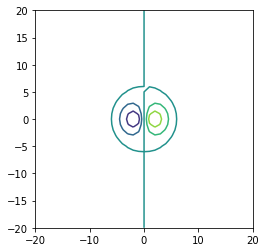

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.contour(x, y, px_values)
ax.set_aspect('equal')

The `contour` command in matplotlib produces a plot where the contour levels are not filled. We might want a filled contour plot instead, so we can use the `contourf` (`f` for `filled`) function instead.

We might also want a color bar to tell us the scale of the colors. The `contour` and `contourf` functions return a variable we can use for a colorbar. You should capture the output of the `contour` or `contourf` command and add a color bar to the figure using `fig.colorbar`.

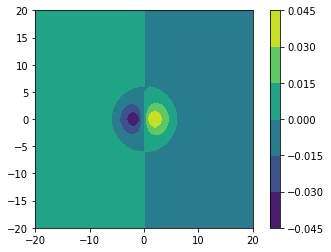

In [7]:
fig, ax = plt.subplots()

CS = ax.contourf(x, y, px_values)
ax.set_aspect('equal')

fig.colorbar(CS)

Picking a Color Map
------------------------

When creating a contour plot, you can also specify the color map you would like to use. You can see a list of built-in color maps for matplotlib [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). 

There are different classes of colormaps you might want to choose depending on the type of data you are looking at. Matplotlib gives the following guidance (see, e.g., [Moreland](http://www.kennethmoreland.com/color-maps/ColorMapsExpanded.pdf)):

1. **Sequential**: change in lightness and often saturation of color incrementally, often using a single hue; should be used for representing information that has ordering.
1. **Diverging**: change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color; should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.
1. **Cyclic**: change in lightness of two different colors that meet in the middle and beginning/end at an unsaturated color; should be used for values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.
1. **Qualitative**: often are miscellaneous colors; should be used to represent information which does not have ordering or relationships.


This data has both positive and negative values, which zero representing a node for the wavefunction. Take a moment and think of which class of color maps would be best for this type of data.

After some consideration, you should arrive at the conclusion that we should use a **diverging** colormap to best represent this data. We will use the colormap "RdBu".

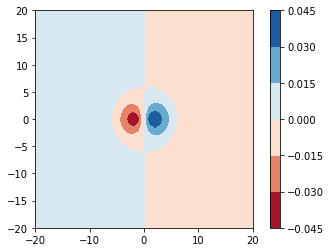

In [8]:
fig, ax = plt.subplots()

CS = ax.contourf(x, y, px_values, cmap="RdBu")
ax.set_aspect('equal')

fig.colorbar(CS)

Number of Contour Colors - Levels
-----------------------------------------

Our plot is only showing six different colors by default, but we might be interested in finger-grain detail of our plot. We will want to specify how many colors, or how many "levels" we want to use in our colormap.

Unfortunately, we can't just say how many levels we want. We have to give numeric values where we would like levels to occur. For example, if our data ranges from -10 to 10 and we want 20 evenly spaced levels (or, a color for every integer), we would need to give matplotlib a list of all the integers to use as levels.

For our data, we would likely want to start at the minimum value and end at the maximum value. We can use a function in numpy called `linspace` to generate evenly spaced numbers between the minimum and maximum.

First, we import numpy and calculate the minimum and maximum of our z values.

In [9]:
import numpy as np

pmin = px_values.min().min()
pmax = px_values.max().max()

Next, we use the `linspace` function in numpy to generate a list of evenly spaced numbers between the minimum and maximum. The following command will create 30 evenly spaced numbers.

In [10]:
levels = np.linspace(pmin, pmax, 30)

levels

array([-0.04045902, -0.03766874, -0.03487847, -0.03208819, -0.02929791,
       -0.02650763, -0.02371736, -0.02092708, -0.0181368 , -0.01534653,
       -0.01255625, -0.00976597, -0.00697569, -0.00418542, -0.00139514,
        0.00139514,  0.00418542,  0.00697569,  0.00976597,  0.01255625,
        0.01534653,  0.0181368 ,  0.02092708,  0.02371736,  0.02650763,
        0.02929791,  0.03208819,  0.03487847,  0.03766874,  0.04045902])

We pass this list of numbers to the `levels` argument in the `contourf` function. Now, we will use 30 colors on our plot. 

The last consideration for this plot is the number of decimal places listed in our color bar. We probably want to cap this at about three. We will use a `format` argument in the `colorbar` command.

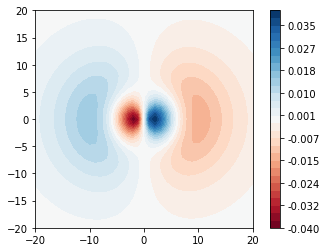

In [11]:
fig, ax = plt.subplots()

CS = ax.contourf(x, y, px_values, cmap="RdBu", levels=levels)
ax.set_aspect('equal')

fig.colorbar(CS, format="%.3f")